In [12]:
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
import mushroom.data.cosmx as cosmx
import mushroom.registration.bigwarp as bigwarp

In [3]:
filepath = '/diskmnt/Projects/Users/estorrs/imaging-analysis/data/htan_talk/cosmx/HT413C1-Th1K4A1Us7_1.h5ad'

In [4]:
adata = cosmx.adata_from_cosmx(filepath)
adata

AnnData object with n_obs × n_vars = 73874 × 1000
    obs: 'nn_fe6192eb.42e5.4fe7.bb87.3f135ac419e1_1_cluster_cluster_0e369590.6582.4f98.888c.31c1e1e79bd2_1', 'nCount_RNA', 'nFeature_RNA', 'nCount_negprobes', 'nFeature_negprobes', 'nn_62902f34.ea2c.4493.a837.18d22e3fcf4e_1_cluster_cluster_1d82bfd6.0c18.43d8.9333.c51e3a80d0bc_1', 'RNA_nbclust_099edabb.2194.47e8.ac53.3b0bba1aff79_1_clusters', 'RNA_nbclust_099edabb.2194.47e8.ac53.3b0bba1aff79_1_posterior_probability', 'fov', 'Area', 'AspectRatio', 'Width', 'Height', 'Mean.PanCK', 'Max.PanCK', 'Mean.CD68', 'Max.CD68', 'Mean.Membrane', 'Max.Membrane', 'Mean.CD45', 'Max.CD45', 'Mean.DAPI', 'Max.DAPI', 'cell_id', 'assay_type', 'version', 'Run_Tissue_name', 'Panel', 'slide_ID', 'cell_ID', 'unassignedTranscripts', 'nCount_falsecode', 'nFeature_falsecode', 'Area.um2', 'CenterX_local_px', 'CenterY_local_px', 'CenterX_global_px', 'CenterY_global_px', 'propNegative', 'complexity', 'errorCtEstimate', 'percOfDataFromError', 'qcFlagsRNACounts', 'qcFla

In [36]:
scale = .2

In [37]:
ddf_fp = '/diskmnt/Projects/Users/estorrs/mushroom/data/projects/submission_v1/HT413C1-Th1k4A1/registration/s8_HT413C1-Th1k4A1-U7_ddf.tif'

ddf = bigwarp.read_bigwarp_warp_field(ddf_fp, scale) # ddfs are (c h w)
ddf.shape

torch.Size([2, 5085, 3640])

In [47]:
ddf[0]

tensor([[39186.7930, 39186.7930, 39186.7930,  ..., 37324.2148, 37324.2148,
         37324.2148],
        [39186.7930, 39186.7930, 39186.7930,  ..., 37324.2148, 37324.2148,
         37324.2148],
        [39186.7930, 39186.7930, 39186.7930,  ..., 37324.2148, 37324.2148,
         37324.2148],
        ...,
        [-8194.2783, -8194.2783, -8194.2783,  ..., -9653.2598, -9653.2598,
         -9653.2598],
        [-8194.2783, -8194.2783, -8194.2783,  ..., -9653.2598, -9653.2598,
         -9653.2598],
        [-8194.2783, -8194.2783, -8194.2783,  ..., -9653.2598, -9653.2598,
         -9653.2598]])

In [48]:
adata.obsm['spatial']

array([[11315, 29445],
       [ 9388, 26254],
       [ 9565, 26224],
       ...,
       [26456,    23],
       [27902,    22],
       [26850,    20]])

In [52]:
ddf[:, 1000, 1000]

tensor([29415.9590, 21708.9824])

In [38]:
ddf.max()

tensor(39186.7930)

In [39]:
adata.obsm['spatial'].max(0)

array([29709, 29768])

In [40]:
next(iter(adata.uns['spatial'].values()))['images']['hires'].shape

(2979, 2979)

In [41]:
next(iter(adata.uns['spatial'].values()))['scalefactors']

{'spot_diameter_fullres': 10.0,
 'tissue_hires_CD45_scalef': 0.1,
 'tissue_hires_CD68_scalef': 0.1,
 'tissue_hires_DNA_scalef': 0.1,
 'tissue_hires_Membrane_scalef': 0.1,
 'tissue_hires_PanCK_scalef': 0.1,
 'tissue_hires_scalef': 0.1}

In [55]:
res = 1.
a = adata.copy()
# a.obsm['spatial'] = (a.obsm['spatial'] * .1).astype(int)

adata2 = bigwarp.register_cosmx(
    a, ddf, resolution=res
)

/diskmnt/Projects/Users/estorrs/miniconda3/envs/mushroom/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [56]:
adata2

AnnData object with n_obs × n_vars = 4343 × 1000
    obs: 'nn_fe6192eb.42e5.4fe7.bb87.3f135ac419e1_1_cluster_cluster_0e369590.6582.4f98.888c.31c1e1e79bd2_1', 'nCount_RNA', 'nFeature_RNA', 'nCount_negprobes', 'nFeature_negprobes', 'nn_62902f34.ea2c.4493.a837.18d22e3fcf4e_1_cluster_cluster_1d82bfd6.0c18.43d8.9333.c51e3a80d0bc_1', 'RNA_nbclust_099edabb.2194.47e8.ac53.3b0bba1aff79_1_clusters', 'RNA_nbclust_099edabb.2194.47e8.ac53.3b0bba1aff79_1_posterior_probability', 'fov', 'Area', 'AspectRatio', 'Width', 'Height', 'Mean.PanCK', 'Max.PanCK', 'Mean.CD68', 'Max.CD68', 'Mean.Membrane', 'Max.Membrane', 'Mean.CD45', 'Max.CD45', 'Mean.DAPI', 'Max.DAPI', 'cell_id', 'assay_type', 'version', 'Run_Tissue_name', 'Panel', 'slide_ID', 'cell_ID', 'unassignedTranscripts', 'nCount_falsecode', 'nFeature_falsecode', 'Area.um2', 'CenterX_local_px', 'CenterY_local_px', 'CenterX_global_px', 'CenterY_global_px', 'propNegative', 'complexity', 'errorCtEstimate', 'percOfDataFromError', 'qcFlagsRNACounts', 'qcFlag

In [44]:
adata2.obsm['spatial']

array([[2363, 1453],
       [2649, 1417],
       [2608, 1420],
       ...,
       [ 750, 4559],
       [ 599, 4589],
       [ 481, 4611]])

(92.79999999999998, 3617.2, 893.45, 4843.55)

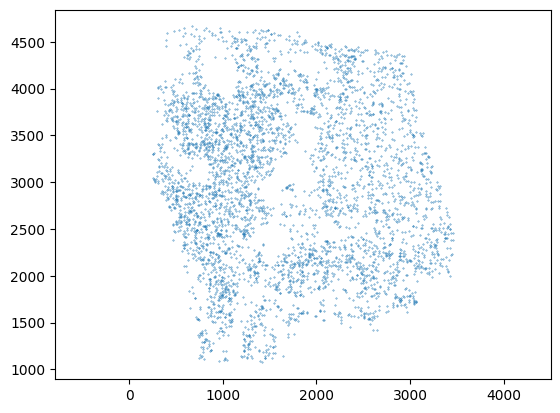

In [45]:
plt.scatter(adata2.obsm['spatial'][:, 0], adata2.obsm['spatial'][:, 1], s=.1)
plt.axis('equal')

(1097.55, 31071.45, -1469.5, 31255.5)

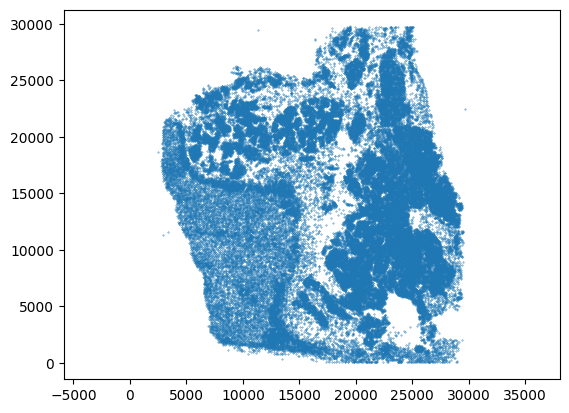

In [46]:
plt.scatter(adata.obsm['spatial'][:, 0], adata.obsm['spatial'][:, 1], s=.1)
plt.axis('equal')